# Milestone 3
This notebook should be connected with milestone 2 at one point, but easier to work with two different notebooks.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns; sns.set()
from matplotlib.font_manager import FontProperties

### Question 1 - How has the crops and livestock production changed since the 1960s?
To get a general picture of how production has changed we start by looking at everything at a world-level.

This question will serve as an intro to the whole project and look at the big trends in the world, with focus on products more than areas. We will mainly study total development of production (without normalizing for population), as this is how the production actually has developed and how the scale has changed during the 50 years.
We will follow these steps:

- Get an overview of development by analyzing at world-level.
- Look if any special products have increased/decreased in popularity.
- Find statistical indicators showing the differences now and in 1960.
- Look for certain countries and areas that stand out.

In [3]:
# Load data
data_path = 'data/pickles/'
meat_cont = pd.read_pickle(data_path + 'meat_continents.pkl')
crops_cont = pd.read_pickle(data_path + 'crops_continents.pkl')
pop_cont = pd.read_pickle(data_path + 'pop_continents.pkl')

In [4]:
from imp import reload
import scripts.visualization
reload(scripts.visualization)
from scripts.visualization import *

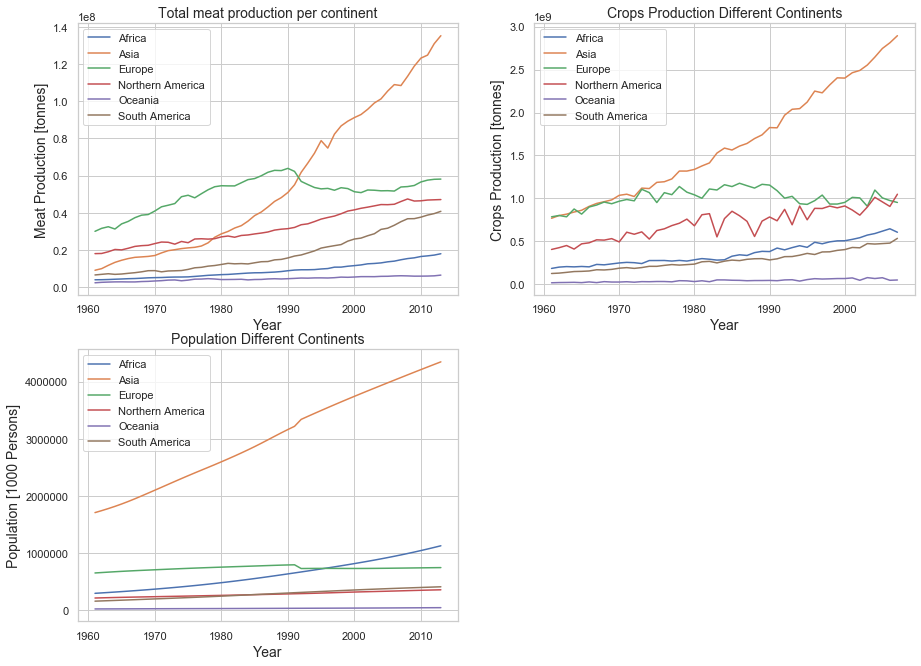

In [5]:
fig = plt.figure(figsize = (15, 11))
meat_total = meat_cont[meat_cont['Item'] == 'Meat, Total']

ax1 = plt.subplot(2,2,1)
plot_compare_areas(meat_total, 
                   y = 'Value', y_label = 'Meat Production [tonnes]',
                   title='Total meat production per continent',
                   subplot = True, ax = ax1)

ax2 = plt.subplot(2,2,2)
plot_compare_areas(crops_cont.groupby(['Area', 'Year']).sum().reset_index(), 
                    y = 'Value', y_label = 'Crops Production [tonnes]',
                    title='Crops Production Different Continents',
                    subplot = True, ax = ax2)

ax3 = plt.subplot(2,2,3)
plot_compare_areas(pop_cont, 
                    y = 'Value', y_label = 'Population [1000 Persons]',
                    title='Population Different Continents',
                    subplot = True, ax = ax3)

We saw these plots earlier already in milestone 2. However, they nicely show how crops and meat production and the population has risen globally. Overall we can see that the driver for total production increase and population increase has been Asia. Europe has perhaps seen the smallest increase, however in these plots it is a bit difficult to compare Oceania to the others continents due to their very low population. Thus, it will be interesting to see how the plots look when we normalize production quantities by population.

In [44]:
# Comparing areawise total production of meat and crops in raw numbers.
meat_indigenous = meat_cont[meat_cont['Item'].str.contains('indigenous')]
meat_1961 = meat_indigenous[meat_indigenous['Year'] == 1961]
meat_2007 = meat_indigenous[meat_indigenous['Year'] == 2007]

comparison_m = pd.DataFrame({'Area':meat_1961.Area.unique(), 
                          '1961 total [tonnes]':meat_1961[meat_1961['Item'] == 'Meat indigenous, total'].Value.values, 
                          '2007 total [tonnes]':meat_2007[meat_2007['Item'] == 'Meat indigenous, total'].Value.values})
comparison_m['% Increase'] = round(comparison_m['2007 total [tonnes]']/comparison_m['1961 total [tonnes]']*100-100,2)

comparison_c = crops_cont[crops_cont['Year'] == 1961].groupby(['Area']).Value.sum().reset_index()

comparison_c['2007 total [tonnes]'] = np.asarray(crops_cont[crops_cont['Year'] == 2007].groupby(['Area']).sum().Value)
comparison_c.rename(columns = {'Value':'1961 total [tonnes]'}, inplace = True)
comparison_c['% Increase'] = round(comparison_c['2007 total [tonnes]']/comparison_c['1961 total [tonnes]']*100-100,2)

comparison_c = comparison_c.append({'Area':'World', '1961 total [tonnes]':comparison_c['1961 total [tonnes]'].sum(),
                                    '2007 total [tonnes]':comparison_c['2007 total [tonnes]'].sum(),
                                    '% Increase':round(comparison_c['2007 total [tonnes]'].sum()/comparison_c['1961 total [tonnes]'].sum()*100-100,2)}, ignore_index = True)
comparison_c.sort_values(by = 'Area')

,Area,1961 total [tonnes],2007 total [tonnes],% Increase
0,Africa,1.851338e+08,6.063324e+08,227.51
1,Asia,7.687699e+08,2.894075e+09,276.46
2,Europe,7.858344e+08,9.528634e+08,21.25
3,Northern America,4.059899e+08,1.048896e+09,158.36
4,Oceania,1.803716e+07,5.058865e+07,180.47
5,South America,1.261255e+08,5.353189e+08,324.43
6,World,2.289891e+09,6.088073e+09,165.87


If we look at the above table, we can see the raw total crop production numbers for each continent. As could be seen in the plots above, all continents have seen an increase. In fact, the production in all continents has has more than doubled except Europe. Overall, there has been an immense increase in production and the World productio has almost tripled.

In [45]:
comparison_m = comparison_m.append({'Area':'World', '1961 total [tonnes]':comparison_m['1961 total [tonnes]'].sum(),
                                    '2007 total [tonnes]':comparison_m['2007 total [tonnes]'].sum(),
                                    '% Increase':round(comparison_m['2007 total [tonnes]'].sum()/comparison_m['1961 total [tonnes]'].sum()*100-100,2)}, ignore_index = True)
comparison_m.sort_values(by = 'Area')

,Area,1961 total [tonnes],2007 total [tonnes],% Increase
0,Africa,3735128.0,14582023.0,290.40
3,Asia,9092846.0,108437188.0,1092.55
4,Europe,30051270.0,53786769.0,78.98
1,Northern America,17962783.0,45513398.0,153.38
5,Oceania,2303732.0,6407046.0,178.12
2,South America,6496489.0,35831342.0,451.55
6,World,69642248.0,264557766.0,279.88


In the above table we can see that the production of meat has increased on every continent, similarly to the change in production of crops. Again it is only Europe that has less tah doubled. Incredibly, meat production has risen by over 1000% in Asia.  Overall, the global meat production has almost quadrupled. 

Text(0.5, 1.0, 'Mean yearly increase of different crops')

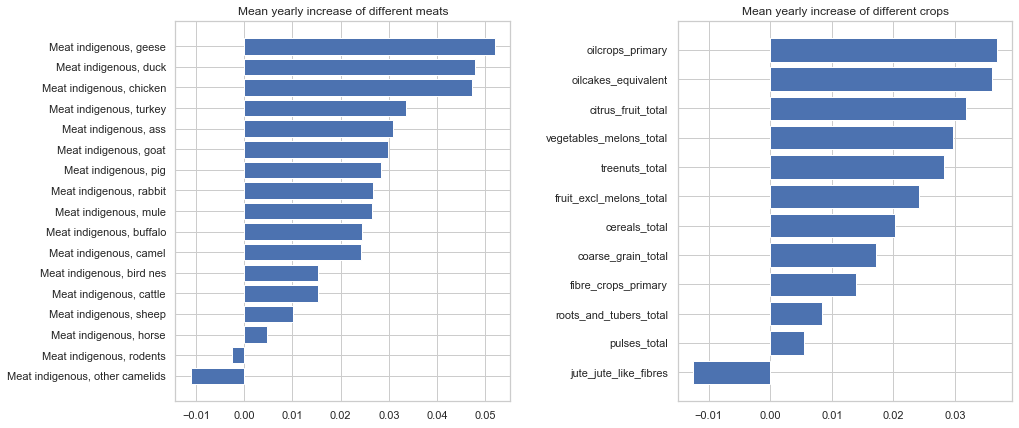

In [46]:
# Comparison of the yearly increases of different meat and crop production. 

fig, ax = plt.subplots(ncols = 2)
fig.set_size_inches(15,7)
fig.subplots_adjust(wspace = 0.5)

# Create dataframes with mean yearly change in production of different products
mean_mproduct_growth = {}
for meat_product in meat_indigenous.Item.unique():
    if (meat_product != 'Meat indigenous, total') & (meat_product != 'Meat indigenous, poultry'):
        mean_mproduct_growth.update({meat_product: (meat_indigenous[meat_indigenous['Item'] == meat_product].groupby('Year').sum().diff()/\
              meat_indigenous[meat_indigenous['Item'] == meat_product].groupby('Year').sum()).Value.mean()})

mean_mproduct_growth = pd.DataFrame(mean_mproduct_growth.values(), mean_mproduct_growth.keys(), columns = ['Mean growth'])
mean_mproduct_growth.sort_values(by='Mean growth', inplace =True)


mean_cproduct_growth = {}
for crop in crops_cont.Item.unique():
    mean_cproduct_growth.update({crop : (crops_cont[crops_cont['Item'] == crop].groupby(['Year']).sum().diff()/\
                                 crops_cont[crops_cont['Item'] == crop].groupby(['Year']).sum()).Value.mean()})

mean_cproduct_growth = pd.DataFrame(mean_cproduct_growth.values(), mean_cproduct_growth.keys(), columns = ['Mean growth'])
mean_cproduct_growth.sort_values(by='Mean growth', inplace =True)


ax[0].barh(mean_mproduct_growth.index, mean_mproduct_growth['Mean growth'])
ax[0].set_title("Mean yearly increase of different meats")

ax[1].barh(mean_cproduct_growth.index, mean_cproduct_growth['Mean growth'])
ax[1].set_title("Mean yearly increase of different crops")

In the above plot we can see that different products have in fact experienced similar yearly increases in their production. The only exceptions are the production of rodents, other camelids and jute&jute like fibres, which have actually decreased in production. Both rodents and other camelids are very small compared to other meat products, thus they have not really affected the overall production. On the opposite side different kinds of poultry have experienced the largest year on year growth with geese at nearly 5%. Poultry is very popular in Asia as well, thus it is no surprise that these have experienced such large growth.

As stated all crops except jute&jute like fibres have grown in production year on year. Interestingly the largest increase have been for oilcrops and oilcakes. With citrus fruit in third place. Overall the year on year growth has been smaller for most crops compared to meat products. Cereals and coarse grain have experienced moderate growth. 

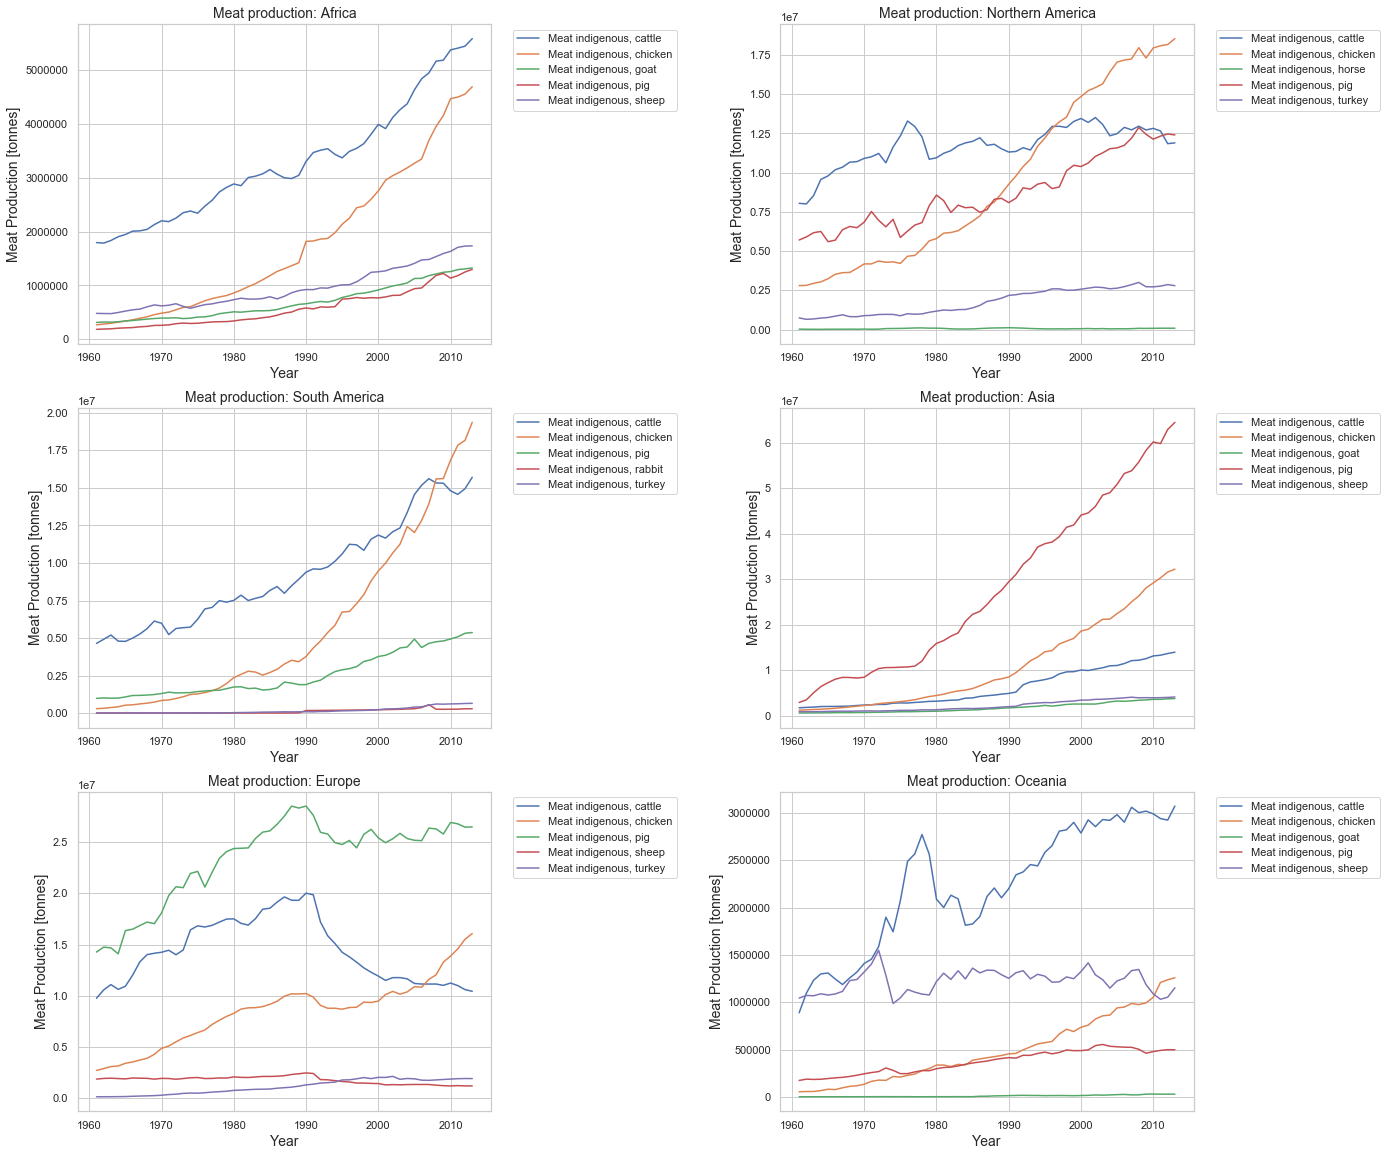

In [58]:
# WIP how to get colors to be consistent?
no_total = meat_indigenous.drop(meat_indigenous[(meat_indigenous['Item'] == 'Meat indigenous, total')
                                               |(meat_indigenous['Item'] == 'Meat indigenous, poultry')].index)


plt.figure(figsize=(20,20)).subplots_adjust(wspace=0.7)
i = 0


for area in meat_indigenous.Area.unique():
    i+=1
    largest_items = no_total[(no_total['Area'] == area) & (no_total['Year'] == 2013)].sort_values(by = 'Value', ascending = False).head(5)
    df_plot = pd.DataFrame()
    for item in largest_items['Item']:
        df_plot = df_plot.append(no_total[no_total['Item'] == item], ignore_index = True)
        
    plot_compare_areas(df_plot[df_plot['Area'] == area], grouping = 'Item',
                  y = 'Value', y_label = 'Meat Production [tonnes]', title = 'Meat production: '+area,
                    subplot = True, ax = plt.subplot(3, 2, i), outside = True)


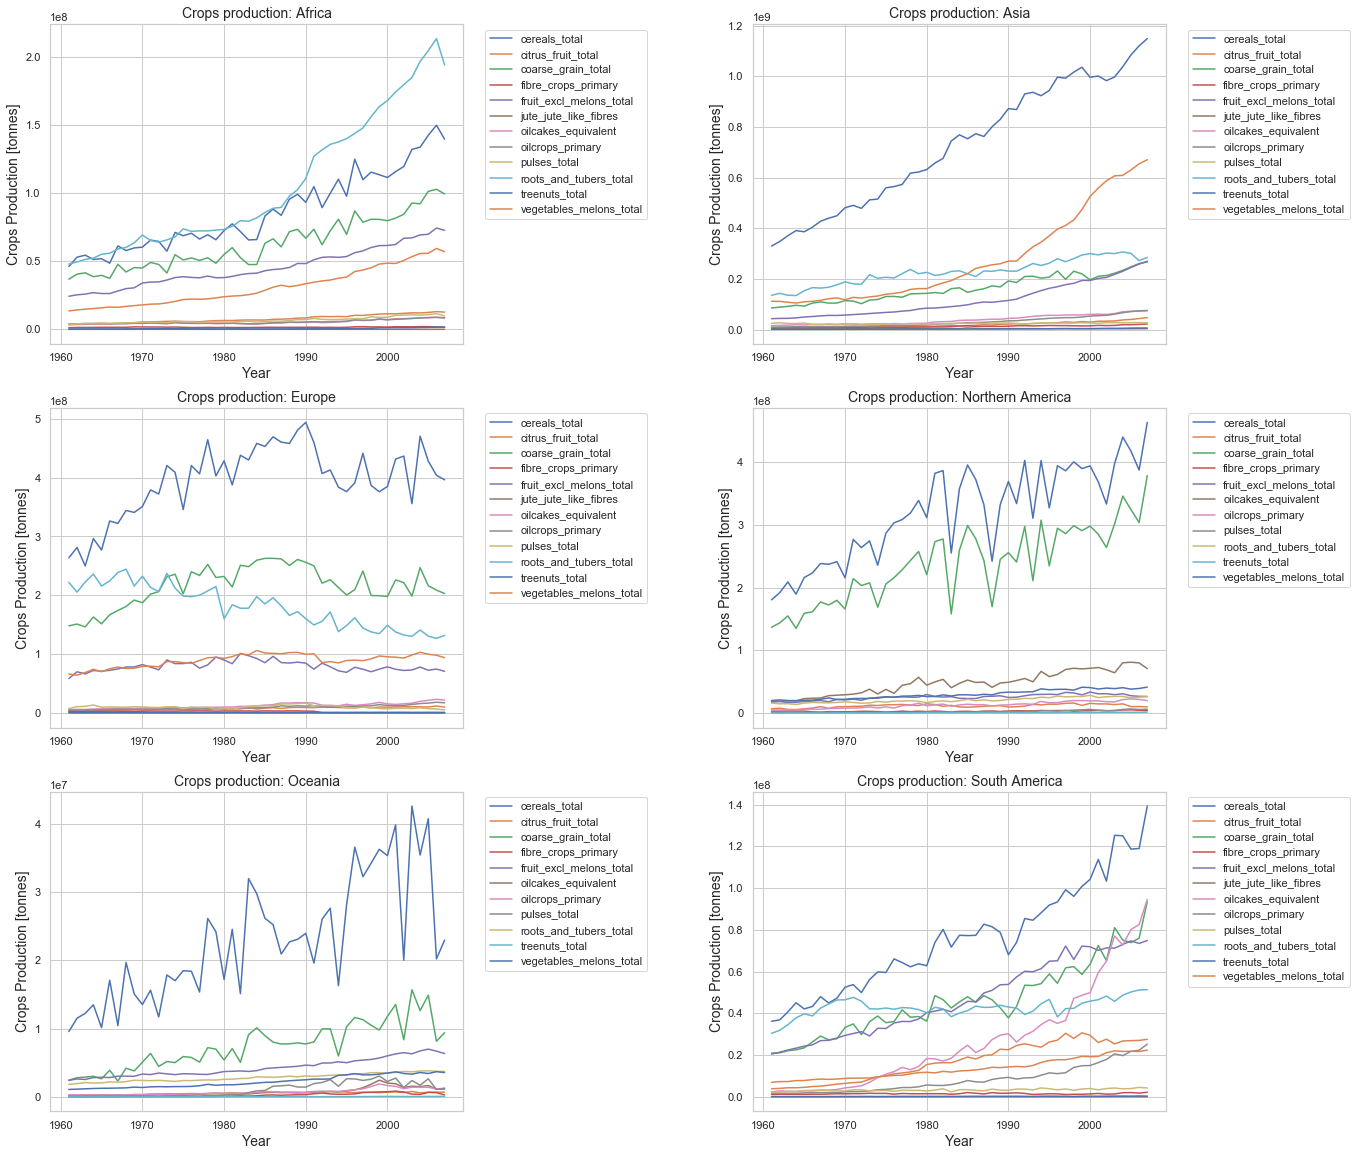

In [9]:
fig = plt.figure(figsize = (20, 20)).subplots_adjust(wspace=0.7)
i = 0

for area in crops_cont.Area.unique():
    i+=1
    plot_compare_areas(crops_cont[crops_cont['Area'] == area], grouping = 'Item',
              y = 'Value', y_label = 'Crops Production [tonnes]', title = 'Crops production: '+area,
                subplot = True, ax = plt.subplot(3, 2, i), outside = True)

We can see that that most products have experienced a positive average growth yearly. Only production of other camelids and jute like fibres has decreased.

### Question 2 - Is there a connection between the development of livestock primary production and crop production?

The purpose of this question is to see if there are any trends in our data, and to answer this we will study both total and normalized data. We will also have to look at

- Are we producing more food per person?
- Has the porportions of meat vs. crops changed in our diet?
- Can we see differences between each continent?

Increase of food production per person:  24.72 %


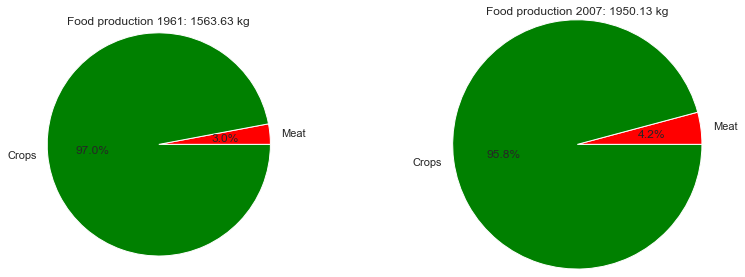

In [60]:
#Year on year growth of meat and crop production
#Average growth of meat production in total per year
mean_meat_prodgrow = (meat_cont[meat_cont['Item'] == 'Meat, Total'].groupby('Year').sum().diff()/\
    meat_cont[meat_cont['Item'] == 'Meat, Total'].groupby('Year').sum()).Value.mean()*100

#Average growth of crops production in total per year
mean_crop_prodgrow = (crops_cont[crops_cont['Item'] == 'cereals_total'].groupby('Year').sum().diff()/\
    crops_cont[crops_cont['Item'] == 'cereals_total'].groupby('Year').sum()).Value.mean()*100

#Average population growth globally per year
mean_pop_growth = (pop_cont.groupby('Year').sum().diff()/pop_cont.groupby('Year').sum()).Value.mean()*100

#Total food production per person in 1961 and 2007
temp1 = (comparison_m['1961 total [tonnes]'].sum()+comparison_c['1961 total [tonnes]'].sum())/pop_cont[(pop_cont['Year'] == 1961)].Value.sum()  
temp2 = (comparison_m['2007 total [tonnes]'].sum()+comparison_c['2007 total [tonnes]'].sum())/pop_cont[(pop_cont['Year'] == 2007)].Value.sum()
change = temp2/temp1*100-100    

temp_labels = ['Meat', 'Crops']
sizes1961 = [(comparison_m['1961 total [tonnes]'].sum()/pop_cont[(pop_cont['Year'] == 1961)].Value.sum())/temp1,
         (comparison_c['1961 total [tonnes]'].sum()/pop_cont[(pop_cont['Year'] == 1961)].Value.sum())/temp1]
sizes2007 = [(comparison_m['2007 total [tonnes]'].sum()/pop_cont[(pop_cont['Year'] == 2007)].Value.sum())/temp1,
         (comparison_c['2007 total [tonnes]'].sum()/pop_cont[(pop_cont['Year'] == 2007)].Value.sum())/temp1]


fig, ax = plt.subplots(1, 2)

fig.set_size_inches(10,10)
fig.subplots_adjust(wspace = 2, hspace = 5)
pie_rad = 2
area = np.pi*(pie_rad**2)

title1 = 'Food production 1961: ' + str(round(temp1, 2)) + ' kg'
title2 = 'Food production 2007: ' + str(round(temp2, 2)) + ' kg'

ax[0].pie(sizes1961, labels = temp_labels, radius = pie_rad, autopct='%1.1f%%', colors = ['red', 'green'])
ax[0].set_title(title1, pad = 50)
ax[1].pie(sizes2007, labels = temp_labels, radius = np.sqrt(area*(1+change/100)/np.pi), autopct='%1.1f%%', colors = ['red', 'green'])
ax[1].set_title(title2, pad = 60)

print('Increase of food production per person: ', round(change, 2), '%')


Globally the food production per person has increased by nearly 25%. At the same time the proportion of meat to crops has change as well, as can be seen in the plot above. In other words, today we produce both more food per person and our diets have become more meat heavy. The increase is very logical as the world has become richer (GDP per capita has steadily increased https://data.worldbank.org/indicator/NY.GDP.PCAP.KD), we produce more food and less people are starving. 

In [131]:
comparison_m.sort_values(by = 'Area', inplace = True)
comparison_c.sort_values(by = 'Area', inplace = True)

pop_cont1961 = pop_cont[pop_cont['Year'] == 1961].drop('Area Code', axis = 1).sort_values(by = 'Area')
pop_cont2007 = pop_cont[pop_cont['Year'] == 2007].drop('Area Code', axis = 1).sort_values(by = 'Area')

product_pers = pd.DataFrame({'Area':pop_cont1961.Area,
                             'Meat per person 1961 (kg)':comparison_m.iloc[:6,1].values/pop_cont1961.Value.values,
                             'Meat per person 2007 (kg)':comparison_m.iloc[:6,2].values/pop_cont2007.Value.values,
                             'Crops per person 1961 (kg)':comparison_c.iloc[:6,1].values/pop_cont1961.Value.values,
                             'Crops per person 2007 (kg)':comparison_c.iloc[:6,2].values/pop_cont2007.Value.values})

product_pers['% Increase meat'] = round(product_pers['Meat per person 2007 (kg)']/product_pers['Meat per person 1961 (kg)']*100-100,2)
product_pers['% Increase crops'] = round(product_pers['Crops per person 2007 (kg)']/product_pers['Crops per person 1961 (kg)']*100-100,2)

product_pers

,Area,Meat per person 1961 (kg),Meat per person 2007 (kg),Crops per person 1961 (kg),Crops per person 2007 (kg),% Increase meat,% Increase crops
0,Africa,12.870233,15.141945,637.920628,629.614385,17.65,-1.30
159,Asia,5.335818,26.635093,451.125715,710.862655,399.18,57.58
212,Europe,46.468266,73.485365,1215.135412,1301.835252,58.14,7.13
53,Northern America,86.406400,136.403041,1952.933606,3143.525706,57.86,60.96
265,Oceania,140.866689,183.577888,1102.921385,1449.491258,30.32,31.42
106,South America,42.534129,94.212414,825.775312,1407.529798,121.50,70.45


In the table above we can see that all continents have seen an increase in production of meat per person, with Asia experiencin the largest increase and Africa the smallest. Europe and Northern America have seen a similar increase, however it is worth noting that the procuction of meat was higher to begin with in Northern America. There are 2 distinct groups in meat production quantities, Asia & Africa and the rest. In growth however Asia is in a league of its own. Overall production is clearly highest per capita in Oceania.

When looking at at the crops production we can see that groups are again quite distinct with Africa and Asia producing the least and while the rest produce much more food per person. Interestingly the production of crops per capita has in fact decreased in Africa while all other continents have experienced growth. 

### Question 3 - How are the differences in production quantities between the different continents?

The purpose of this question is to study the difference in production at a continent-level. For example, it can be interesting to see the difference between developed continents, like Europe and North-America, and continents like Africa and Asia.

- Study food production in general, and with a crops vs. meat analysis.
- What can be said about the normalized production?
- Can we say if any continents are producing more than it needs?
- Try to find data on how much food a person needs per year.
    - This is pretty hard because of energy/tonne

In [125]:
pop_cont1961

,index,Area,Year,Unit,Value
0,0,Africa,1961,1000 persons,290214.489
1,159,Asia,1961,1000 persons,1704114.634
2,212,Europe,1961,1000 persons,646705.219
3,53,Northern America,1961,1000 persons,207887.183
4,265,Oceania,1961,1000 persons,16353.987
5,106,South America,1961,1000 persons,152735.914


### Question 4 - How has the development in agriculture affected emission of greenhouse gasses?

This question is about the consequences of what we have studied in the previous questions.

- Can we find evidence that higher meat consumption leads to higher emissions?
- Is it better for the environment to eat crops rather than livestock?
- Are there any particular meat or crop that affect the CO2 emissions more/less than the average?

In [11]:
# Load data from total agricultural emissions dataset
emission_data = pd.read_pickle(data_path + 'agriculture_emissions_continents.pkl')
emission_data.head(5)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,GT,Agriculture Total,5100,Africa,7231,Emissions (CO2eq),1711,Agriculture total,1961,1961,gigagrams,233438.4999,A,"Aggregate, may include official, semi-official...",NaN
1,GT,Agriculture Total,5100,Africa,7231,Emissions (CO2eq),1711,Agriculture total,1962,1962,gigagrams,237662.8733,A,"Aggregate, may include official, semi-official...",NaN
2,GT,Agriculture Total,5100,Africa,7231,Emissions (CO2eq),1711,Agriculture total,1963,1963,gigagrams,241883.7194,A,"Aggregate, may include official, semi-official...",NaN
3,GT,Agriculture Total,5100,Africa,7231,Emissions (CO2eq),1711,Agriculture total,1964,1964,gigagrams,248689.6523,A,"Aggregate, may include official, semi-official...",NaN
4,GT,Agriculture Total,5100,Africa,7231,Emissions (CO2eq),1711,Agriculture total,1965,1965,gigagrams,255912.4287,A,"Aggregate, may include official, semi-official...",NaN


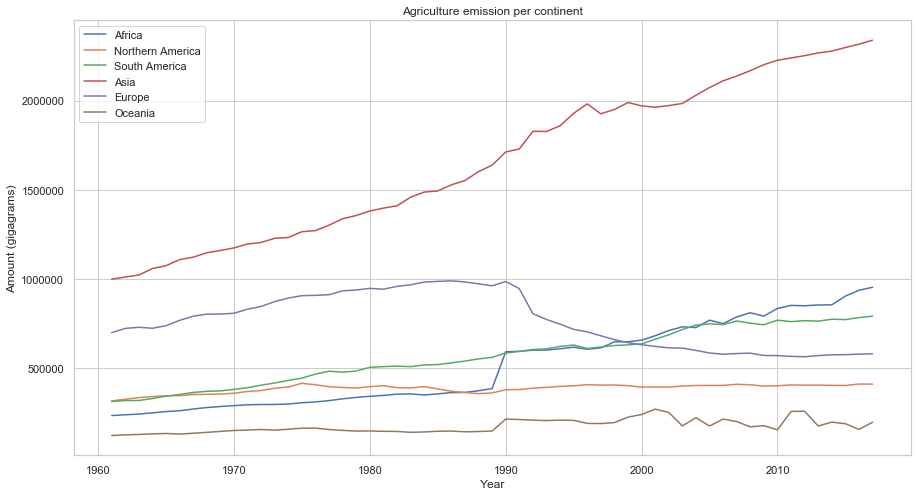

In [12]:
# Plot total CO2 emission data per continent 
fig = plt.figure(figsize = (15,8))

for area in emission_data.Area.unique():
    plt.plot(emission_data[emission_data['Area'] == area].Year.values, 
             emission_data[emission_data['Area'] == area].Value.values)
    
plt.legend(emission_data.Area.unique())
plt.title('Agriculture emission per continent')
plt.xlabel('Year')
plt.ylabel('Amount (gigagrams)')
plt.show()

From the plot above it is possible to see that the CO2 emissions from agriculture has increased in every continent since the 1960s, apart from Europe. Europe has had a large decrease in agriculture emissions. How is this connected to its livestock/crops production?

#### Study regarding Europe's emissions

<Figure size 1080x576 with 0 Axes>

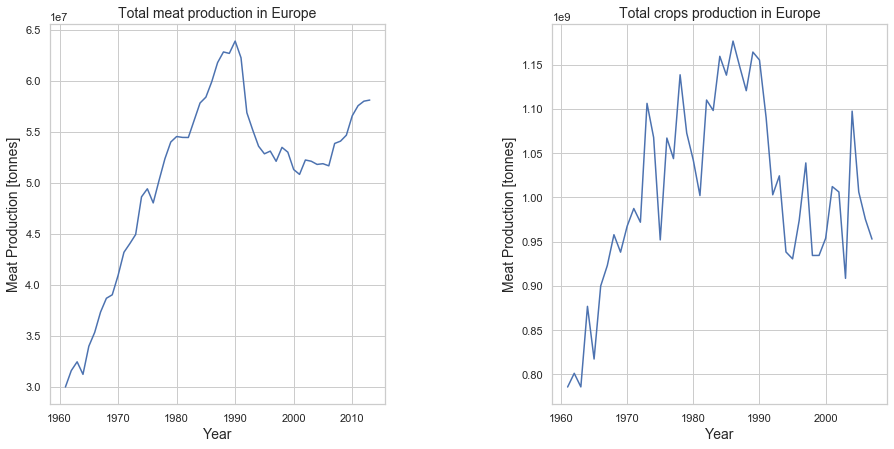

In [13]:
crops_total = crops_cont.groupby(['Area', 'Year']).agg({'Value':'sum'}).reset_index()
meat_total = meat_cont[meat_cont['Item'] == 'Meat, Total']

fig = plt.figure(figsize = (15,8))
plot_crop_livestock(meat_total[meat_total.Area.str.contains('Europe')], crops_total[crops_total.Area.str.contains('Europe')], 
                    y = 'Value', y_label = 'Meat Production [tonnes]',
                    title1='Total meat production in Europe', title2='Total crops production in Europe',
                    subplot = False)

We choose to compare the emissions and the crops/meat production in 1990 vs. 2005. The emissions were at its highest in 1990 and they are a lot lower in 2005. Can we find a connection between less meat production leading to lower emissions? 

In [72]:
# Function to calculate change in crops & meat production and CO2 emissions between two years for a certain area
def calculate_year_change(year1, year2, area):
    crops_prod_y1 = crops_total[crops_total.Year == year1][crops_total.Area.str.contains(area)].Value.array[0]
    meat_prod_y1 = meat_total[meat_total.Year == year1][meat_total.Area.str.contains(area)].Value.array[0]
    emissions_y1 = emission_data[emission_data.Year == year1][emission_data.Area.str.contains(area)].Value.array[0]

    crops_prod_y2 = crops_total[crops_total.Year == year2][crops_total.Area.str.contains(area)].Value.array[0]
    meat_prod_y2 = meat_total[meat_total.Year == year2][meat_total.Area.str.contains(area)].Value.array[0]
    emissions_y2 = emission_data[emission_data.Year == year2][emission_data.Area.str.contains(area)].Value.array[0]
    
    print(area, ':', year1, 'vs.', year2)

    meat_change = meat_prod_y2 / meat_prod_y1
    crops_change = crops_prod_y2 / crops_prod_y1
    emissions_change = emissions_y2 / emissions_y1

    print('\nThe meat production in 1990 is approximatly %3.0f%% of what it was in 1990.' % (meat_change*100))
    print('The crops production in 1990 is approximatly %3.0f%% of what it was in 1990.' % (crops_change*100))
    print('The agricultural emissions in 1990 are approximatly %3.0f%% of what they were in 1990.' % (emissions_change*100))
    
calculate_year_change(1980, 2005, 'Europe')

Europe : 1980 vs. 2005

The meat production in 1990 is approximatly  95% of what it was in 1990.
The crops production in 1990 is approximatly  97% of what it was in 1990.
The agricultural emissions in 1990 are approximatly  62% of what they were in 1990.


We can see here that we aren't producing that much less food in 2005 compared to 1990 but we still get a huge decrease in emissions. There is only a 13% decrease in crops production and a 19% decrease in meat production and this change results in 41% decrease in emissions. This information is not detailed enough to be able to say weather the decrease in meat production has lead to the decrease in emissions. 

#### Correlation between emissions and total crops production / total meat production

We choose to study the correlation between meat & crops production and the emissions to see if there is a strong connection. Since the crops dataset only has data up to 2007 we will only study the data up until 2007.

In [85]:
meat_relevant = meat_total[meat_total.Year < 2008]
emissions_relevant = emission_data[emission_data.Year < 2008]

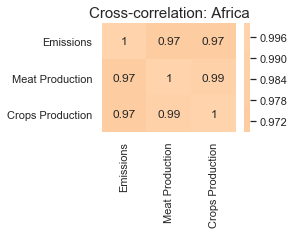

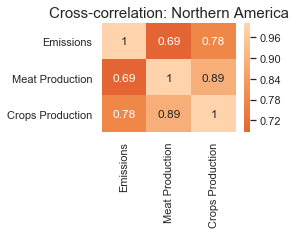

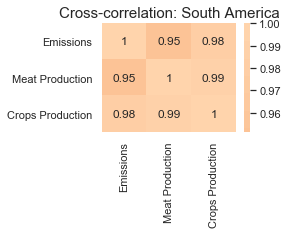

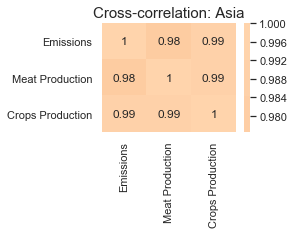

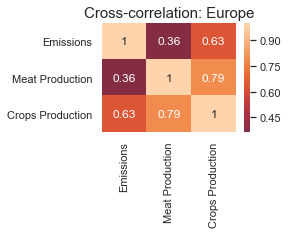

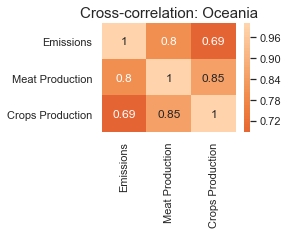

In [77]:
def check_correlation(meat_data, crops_data, emission_data):
    for area in meat_data.Area.unique():
        meat = meat_data[meat_data.Area.str.contains(area)].reset_index()
        crops = crops_data[crops_data.Area.str.contains(area)].reset_index()
        emissions = emission_data[emission_data.Area.str.contains(area)].reset_index()

        corr_data = pd.DataFrame(data = {'Emissions': emissions.Value, 'Meat Production': meat.Value, 'Crops Production': crops.Value}) 
        corr = corr_data.corr()
        fig = plt.figure(figsize = (3, 2))

        ax = sns.heatmap(corr, center = 0, annot = True)
        plt.yticks(rotation= 0)
        plt.xticks(rotation= 90)
        plt.title('Cross-correlation: ' + area, fontsize = 15)
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
        plt.show()
        
check_correlation(meat_relevant, crops_total, emissions_relevant)

As we can see from the first row in each of the correlation matrices, there is no specific pattern regarding the correlation between meat production and emissions or crops production and emissions.

#### Study on different crops/meat categories

In [73]:
world_categorized_emissions = pd.read_pickle(data_path + 'world_categorized_emissions.pkl')
world_categorized_production = pd.read_pickle(data_path + 'world_categorized_production.pkl')

world_categorized_emissions.Item.unique()

array(['Cereals excluding rice', 'Rice, paddy', 'Meat, cattle',
       'Meat, goat', 'Meat, buffalo', 'Meat, sheep', 'Meat, chicken',
       'Meat, pig'], dtype=object)

As we can see, there are only two types of crop categories. We are therefore missing emission data for other categories. The same goes for meat, as we for example are missing emissions for camel. We will have to work with the little information that we have for now.

We choose to plot the emissions per product category. The emissions are given as amount of gigagrams emitted per tonne produced.

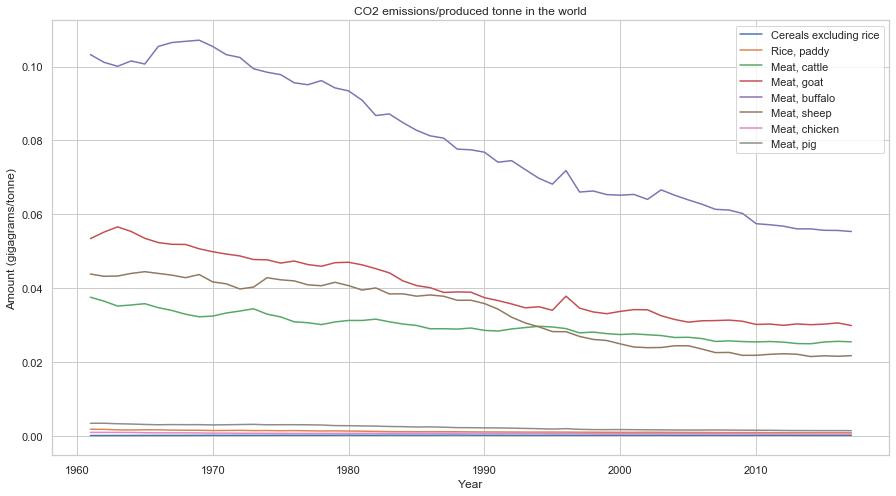

In [74]:
# Plot how much each type of meat emits for every tonne produced
fig = plt.figure(figsize = (15,8))

for item in world_categorized_emissions.Item.unique():
    plt.plot(world_categorized_emissions[world_categorized_emissions['Item'] == item].Year.values, 
             world_categorized_emissions[world_categorized_emissions['Item'] == item].Value.values
             /(world_categorized_production[world_categorized_production['Item'] == item].Value.values))
    
plt.legend(world_categorized_emissions.Item.unique())

plt.title('CO2 emissions/produced tonne in the world')
plt.xlabel('Year')
plt.ylabel('Amount (gigagrams/tonne)')
plt.show()

As we can see we are producing meat in a more sustainable way nowadays compared to 1960, since we are emitting less CO2 today per tonne meat produced compared to 1960. The same goes for the crops production cor cereals and rice. We can also see that the amount of emissions per tonne cereal/rice crops produced is a lot lower than the emissions for cattle, goat, buffalo and sheep. Pig and chicken however have low emissions.

#### Correlation between emissions and specific crops/meat categories

Since we are able to see such a huge difference in emissions between buffalo, cattle, sheep and goat in comparison towards the other categories, we will study the correlation one last time between emission and these distinct categories to see if there is anything interesting to be found.  We will also check four of the most produced crops categories: cereals_total, coarse_grain_total, roots_and_tubers_total, fruit_excl_melons_total.

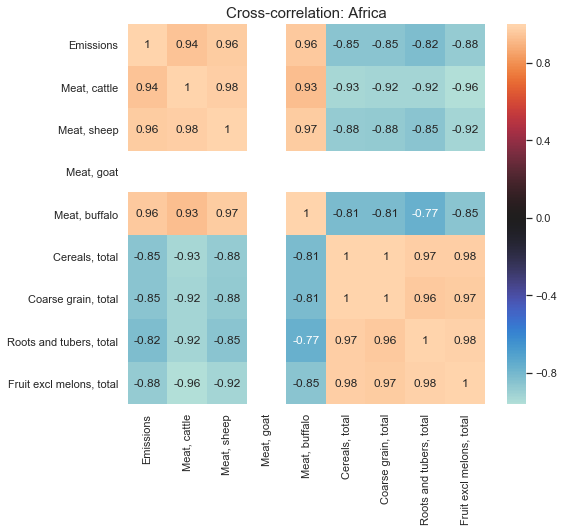

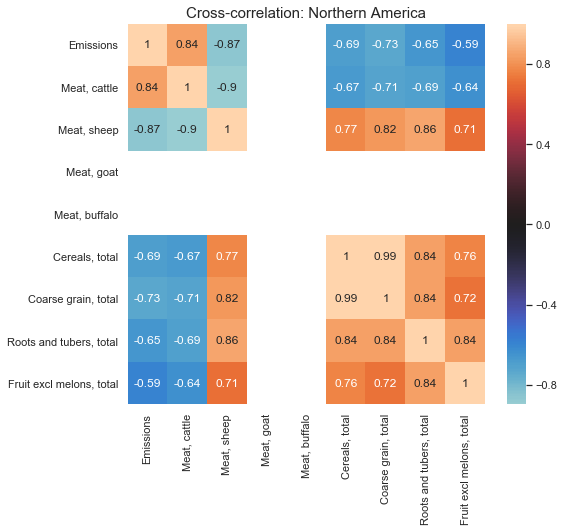

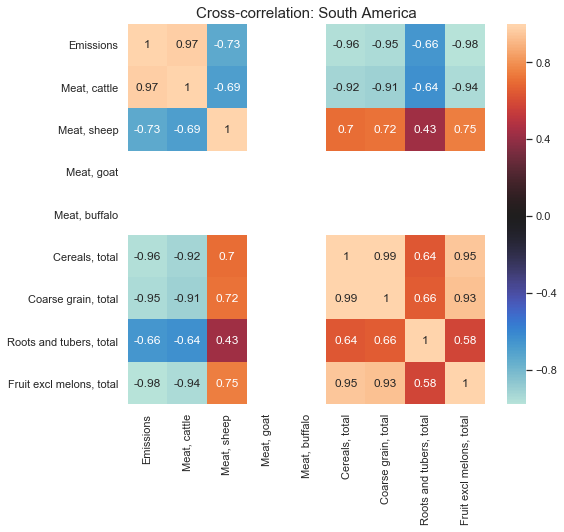

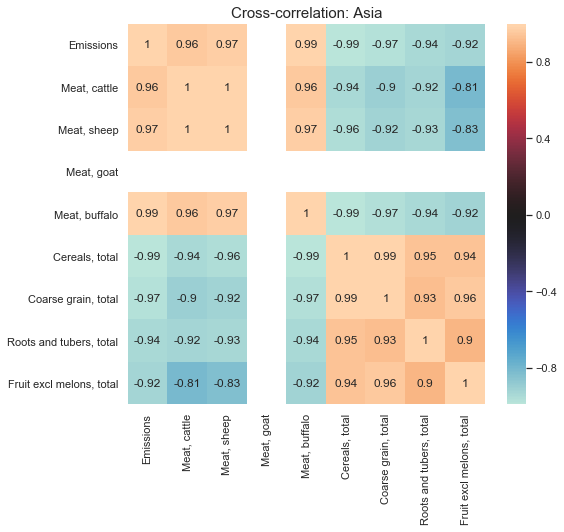

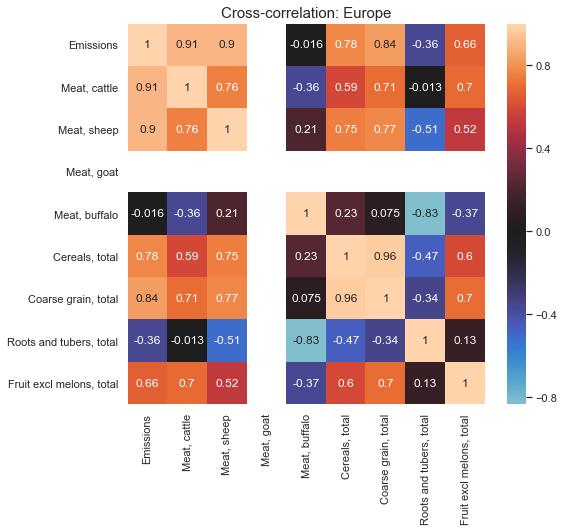

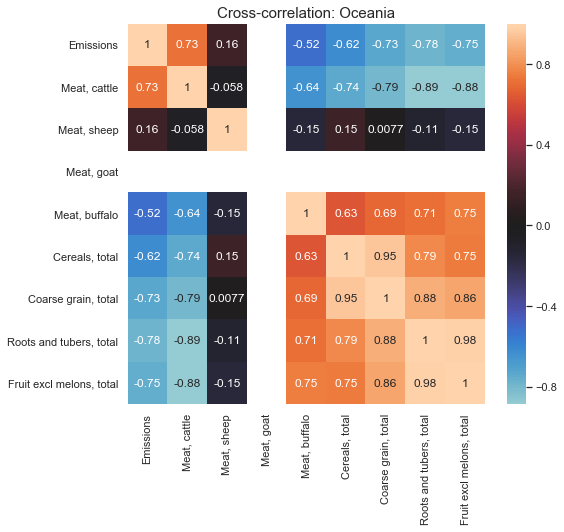

In [98]:
meat_cat = ['Meat, cattle', 'Meat, buffalo', 'Meat, sheep', 'Meat,goat']
crops_cat = ['cereals_total', 'coarse_grain_total', 'roots_and_tubers_total', 'fruit_excl_melons_total']

meat_relevant = meat_cont[meat_cont.Item.isin(meat_cat)][meat_cont.Year < 2008]
crops_relevant = crops_cont[crops_cont.Item.isin(crops_cat)]

# I know that this is repeating the code from earlier
def check_correlation_categories(meat_relevant, crops_relevant, emissions_relevant):
    for area in meat_relevant.Area.unique():
            meat = meat_relevant[meat_relevant.Area.str.contains(area)].reset_index()
            crops = crops_relevant[crops_relevant.Area.str.contains(area)].reset_index()
            emissions = emissions_relevant[emissions_relevant.Area.str.contains(area)].reset_index()

            corr_data = pd.DataFrame(data = {'Emissions': emissions.Value, 
                                             'Meat, cattle': meat[meat.Item.str.contains('Meat, cattle')].reset_index().Value,
                                             'Meat, sheep': meat[meat.Item.str.contains('Meat, sheep')].reset_index().Value,
                                             'Meat, goat': meat[meat.Item.str.contains('Meat, goat')].reset_index().Value,
                                             'Meat, buffalo': meat[meat.Item.str.contains('Meat, buffalo')].reset_index().Value,
                                             'Cereals, total': crops[crops.Item.str.contains('cereals_total')].reset_index().Value,
                                             'Coarse grain, total': crops[crops.Item.str.contains('coarse_grain_total')].reset_index().Value,
                                             'Roots and tubers, total': crops[crops.Item.str.contains('roots_and_tubers_total')].reset_index().Value,
                                             'Fruit excl melons, total': crops[crops.Item.str.contains('fruit_excl_melons_total')].reset_index().Value}) 
            corr = corr_data.corr()
            fig = plt.figure(figsize = (8, 7))

            ax = sns.heatmap(corr, center = 0, annot = True)
            plt.yticks(rotation= 0)
            plt.xticks(rotation= 90)
            plt.title('Cross-correlation: ' + area, fontsize = 15)
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            plt.show()

check_correlation_categories(meat_relevant, crops_relevant, emissions_relevant)

As we can see here, these four meat categories do in general correlate with the emissions and the crops do not. Europe is an exception as here the crops actually do correlate with the emission.

What does this correlation matrix look like on a world level?

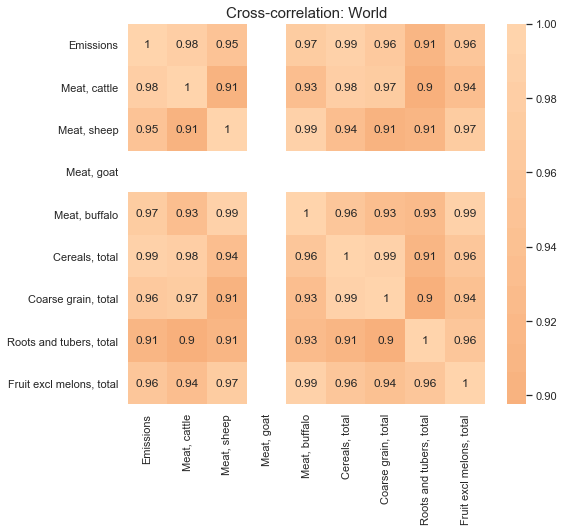

In [99]:
meat_world_relevant = meat_relevant.groupby(['Item','Year']).agg({'Value':'sum'}).reset_index()
meat_world_relevant['Area'] = 'World'
crops_world_relevant = crops_relevant.groupby(['Item','Year']).agg({'Value':'sum'}).reset_index()
crops_world_relevant['Area'] = 'World'
emissions_world_relevant = emissions_relevant.groupby(['Item','Year']).agg({'Value':'sum'}).reset_index()
emissions_world_relevant['Area'] = 'World'

check_correlation_categories(meat_world_relevant, crops_world_relevant, emissions_world_relevant)

It's odd that the correlation matrix above looks so different when looking at world level compared to continent level. 